In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

#### 2. Data Preparation and Cleaning

In [53]:
# Importing data
apps_df = pd.read_csv('apps.csv')
reviews_df = pd.read_csv('user_reviews.csv')

In [54]:
apps_df.head(5)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [55]:
reviews_df.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [56]:
# Checking for duplicates
print("Number of duplicate entries in Apps Data:", apps_df.duplicated().sum())
print("Number of duplicate entries in Reviews Data:", reviews_df.duplicated().sum())

Number of duplicate entries in Apps Data: 0
Number of duplicate entries in Reviews Data: 33616


In [57]:
# Dropping duplicates
apps_df.drop_duplicates(inplace=True)
reviews_df.drop_duplicates(inplace=True)

#### 3. Refining the Data

In [58]:
# Cleaning 'Installs' and 'Price' columns
apps_df['Installs'] = apps_df['Installs'].astype(str).str.replace(',', '').str.replace('+', '')
apps_df['Price'] = apps_df['Price'].astype(str).str.replace('$', '')

In [59]:
# Convert cleaned columns to float, handling errors
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], errors='coerce')
apps_df['Price'] = pd.to_numeric(apps_df['Price'], errors='coerce')


#### 4.  Converting Data Types

In [60]:
# Confirming the conversion (this step is now incorporated above)
print(apps_df[['Installs', 'Price']].dtypes)

Installs      int64
Price       float64
dtype: object


#### 5. Exploring App Categories

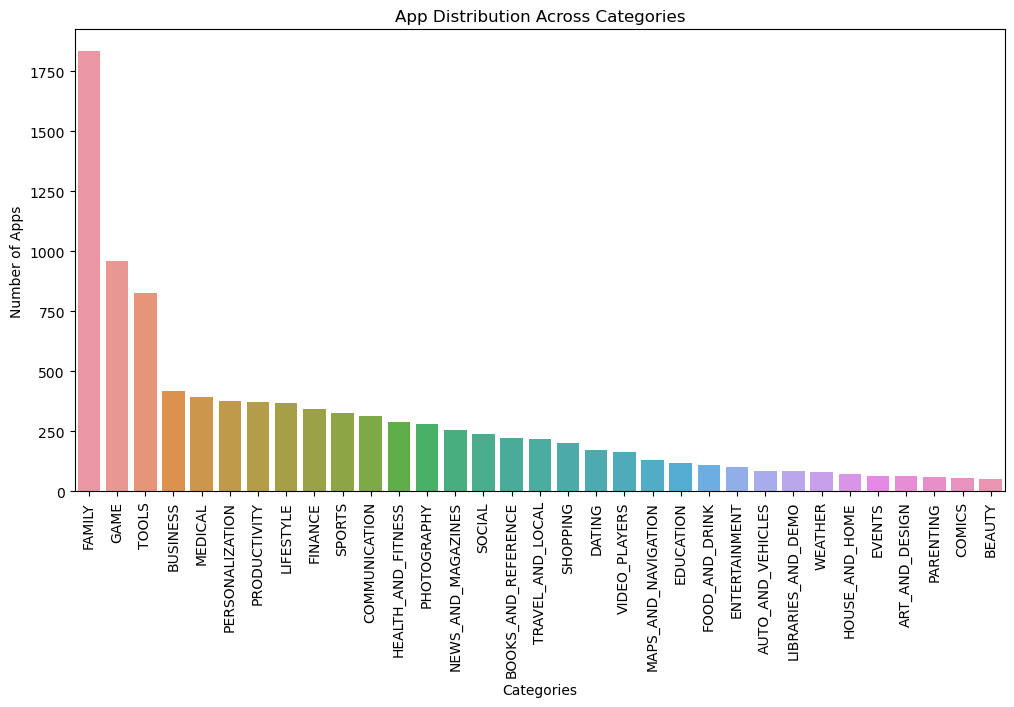

In [61]:
category_counts = apps_df['Category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=90)
plt.title('App Distribution Across Categories')
plt.ylabel('Number of Apps')
plt.xlabel('Categories')
plt.show()


#### 6. Distribution of App Ratings

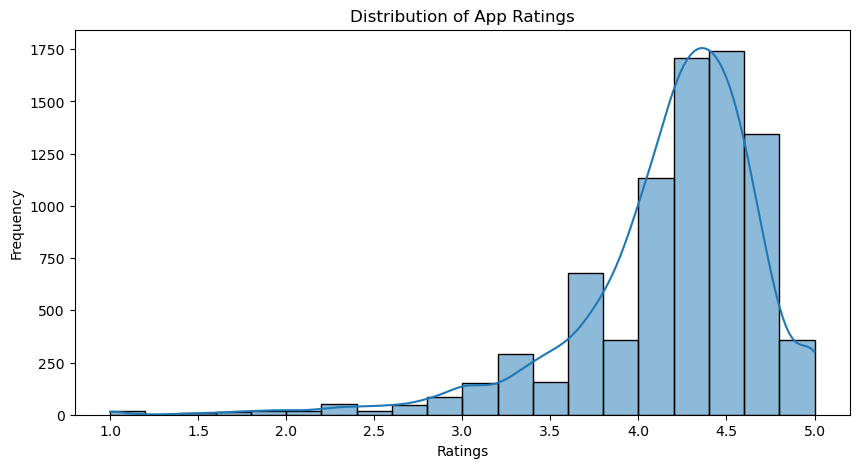

In [62]:
plt.figure(figsize=(10, 5))
sns.histplot(apps_df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()


#### 7. The Size and Price of Apps

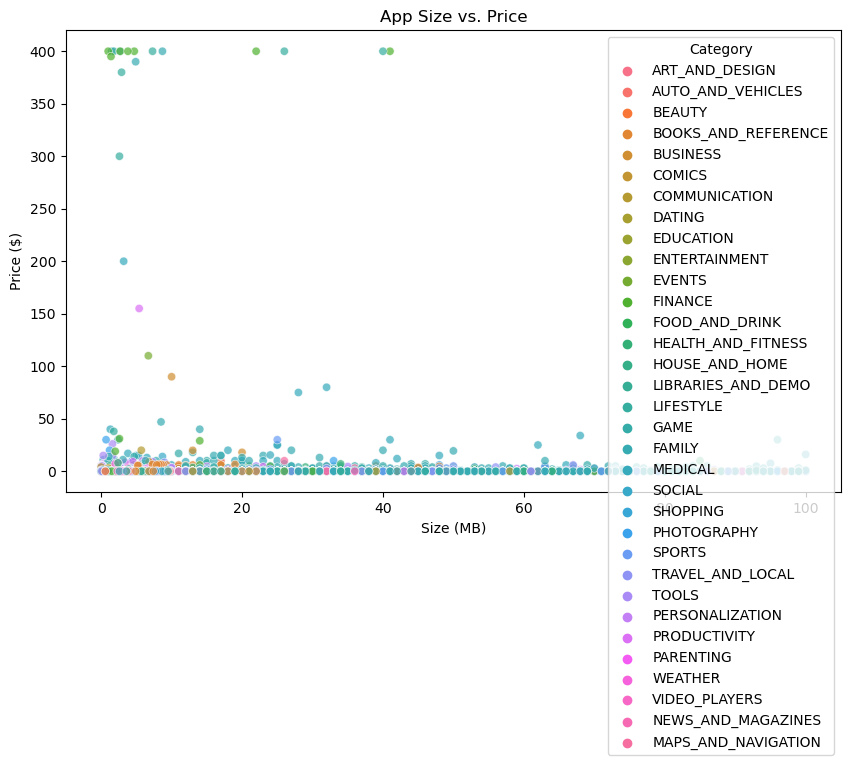

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=apps_df, x='Size', y='Price', hue='Category', alpha=0.7)
plt.title('App Size vs. Price')
plt.xlabel('Size (MB)')
plt.ylabel('Price ($)')
plt.show()

#### 8. The Pricey Side of Apps

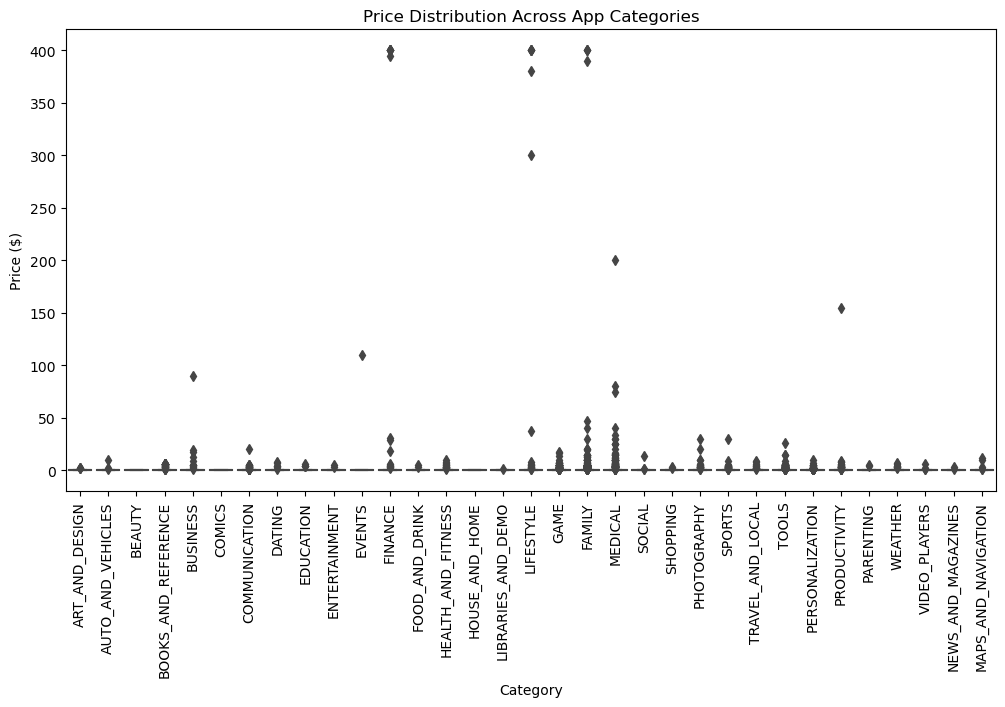

In [64]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=apps_df, x='Category', y='Price')
plt.xticks(rotation=90)
plt.title('Price Distribution Across App Categories')
plt.ylabel('Price ($)')
plt.show()

#### 9. Sentiment Analysis of User Reviews

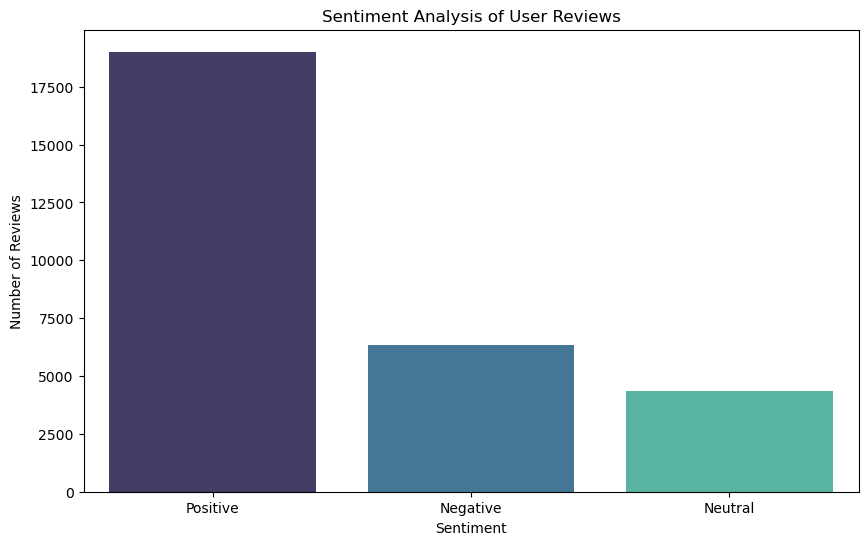

In [65]:
# Assuming the sentiment analysis has already been performed and stored in reviews_df
sentiment_counts = reviews_df['Sentiment'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='mako')
plt.title('Sentiment Analysis of User Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


#### 10. Filtering Out 'Junk' Apps (optional step, can be customized further)

In [66]:
# Example filter: Remove apps with less than a certain rating and installs
filtered_apps = apps_df[(apps_df['Rating'] >= 4) & (apps_df['Installs'] >= 10000)]

In [67]:
filtered_apps

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9633,10815,Golden Dictionary (FR-AR),BOOKS_AND_REFERENCE,4.2,5775,4.9,500000,Free,0.0,Everyone,Books & Reference,"July 19, 2018",7.0.4.6,4.2 and up
9635,10817,HTC Sense Input - FR,TOOLS,4.0,885,8.0,100000,Free,0.0,Everyone,Tools,"October 30, 2015",1.0.612928,5.0 and up
9644,10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,NaN,5000000,Free,0.0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device
9647,10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.4,10000,Free,0.0,Everyone,Books & Reference,"June 19, 2016",2.96,4.1 and up


#### 11. Paid vs. Free Apps: The Download Dilemma

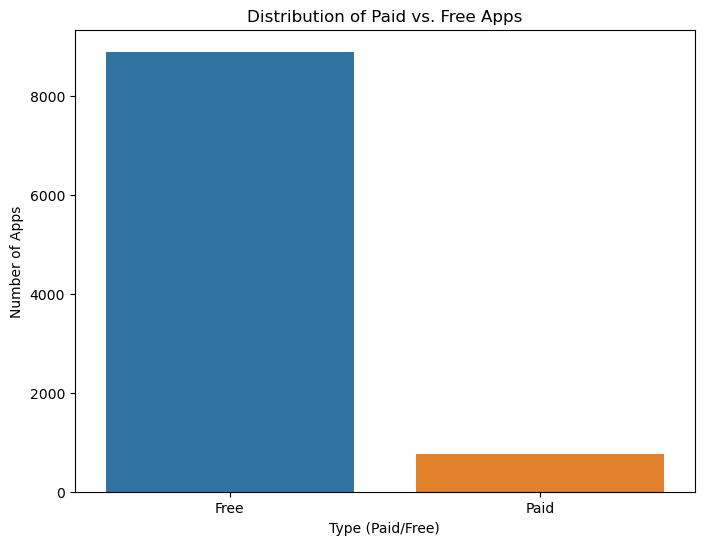

In [68]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=apps_df)
plt.title('Distribution of Paid vs. Free Apps')
plt.ylabel('Number of Apps')
plt.xlabel('Type (Paid/Free)')
plt.show()

#### 12. Machine Learning Prediction (Example: Price Prediction)

In [69]:
# Assume `X` and `y` are your feature matrix and target vector respectively
# Using a pipeline for consistent preprocessing

# Step 1: Define the pipeline with an imputer and the model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('model', LinearRegression())
])

In [70]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Step 3: Fit the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()), ('model', LinearRegression())])

In [72]:
# Step 4: Make predictions
y_pred = pipeline.predict(X_test)

In [73]:
# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 161.52742080207028
R^2 Score: -9.454914736140019e-05


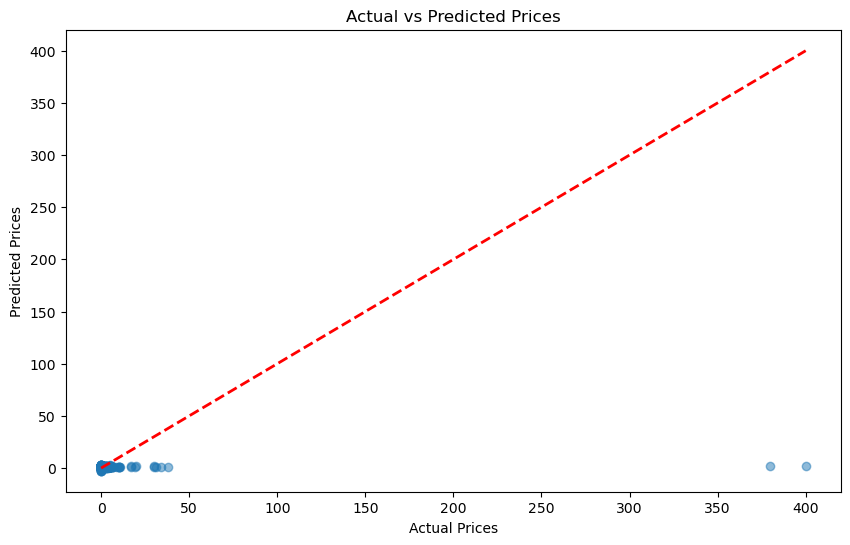

In [74]:
# Step 6: Visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)  # Line of equality
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [75]:
 # Step 7: Interpret Feature Coefficients
# To understand feature impact if LinearRegression was used directly (without Pipeline)
model = pipeline.named_steps['model']  # Extracting model from the pipeline
feature_importance = pd.Series(model.coef_, index=X.columns)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
Category   -3.520307e-02
Rating     -5.269486e-01
Installs   -3.215313e-09
dtype: float64


### Model Insights and Recommendations

**Model Performance Summary**:
- **Mean Squared Error (MSE):** 161.53 - This high value indicates a relatively high average squared error, meaning the predictions are, on average, quite far from the actual values.
- **R² Score:** -0.0001 - This near-zero value suggests that the model does not explain any variance in the target variable. A negative R² indicates that the model is performing worse than a simple baseline prediction (predicting the mean for every observation).

**Insights**:
- The high MSE and near-zero R² score suggest that the current features may not have a strong linear relationship with the target variable. Possible reasons include:
  - **Inadequate features**: The features may not be good predictors of the target.
  - **Non-linear relationships**: The relationship between the features and target may not be linear, limiting a linear regression model's effectiveness.
  - **Noise in the data**: High levels of variability or noise could obscure meaningful patterns.

**Recommendations to Improve Model Performance**:

1. **Feature Engineering**:
   - Explore additional or alternative features that might better capture the underlying patterns.
   - Apply feature transformations (e.g., logarithmic, polynomial terms) if non-linear relationships are suspected.
   - Conduct feature selection to retain only the most predictive features.

2. **Model Selection**:
   - Experiment with other models capable of capturing non-linear relationships, such as `RandomForestRegressor`, `GradientBoostingRegressor`, or `Support Vector Regressor`.
   - Consider using models like `XGBoost` or `LightGBM`, which often perform well with complex data.

3. **Data Preprocessing**:
   - Check for outliers or extreme values in the data that could skew the model.
   - Ensure all missing values are handled appropriately, and categorical data is correctly encoded.

4. **Re-evaluate the Prediction Goal and Data Quality**:
   - **Target Variability**: If the target variable has low variance or high volatility, the model may struggle with accuracy.
   - **Data Quality Assessment**: Verify data quality, including noise and potential errors or inconsistencies.

5. **Business Recommendations**:
   - If predictions are not reliable, consider adjustments in data collection to capture more relevant information.
   - Reframe the business objective: If predictions are unattainable with current data, explore clustering or data exploration methods to find trends and insights.


                                                                   THANK YOU!

In [ ]:
                                                               SHAIK TOUSIF ADNAN